In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
df=pd.read_csv('Titanic.csv')

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [82]:
#cleaning the data.checking where data is incomplete,here true means its a nul value(missing data),if its false then it contains data
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


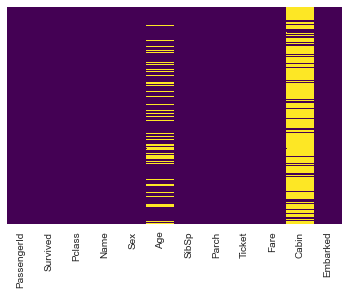

In [83]:
#heat map for checking incomplete data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [84]:
#in above heatmap yellow color represents empty rows

In [85]:
sns.set_style('whitegrid')

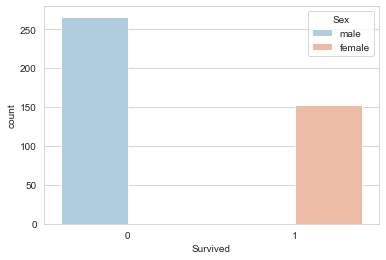

In [86]:
sns.countplot(x='Survived',data=df,hue='Sex',palette='RdBu_r')

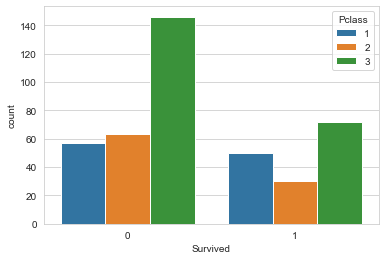

In [87]:
sns.countplot(x='Survived',data=df,hue='Pclass')

C:\Users\sankeerth\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



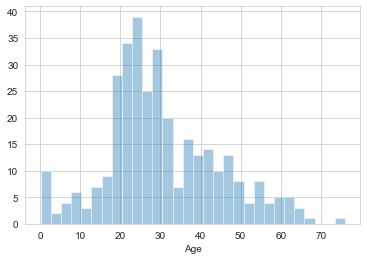

In [88]:
sns.distplot(df['Age'].dropna(),kde=False,bins=30)

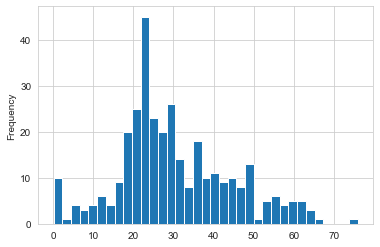

In [89]:
df['Age'].plot.hist(bins=35)

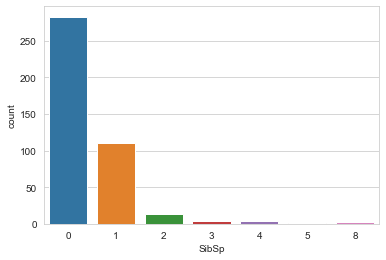

In [90]:
sns.countplot(x='SibSp',data=df)

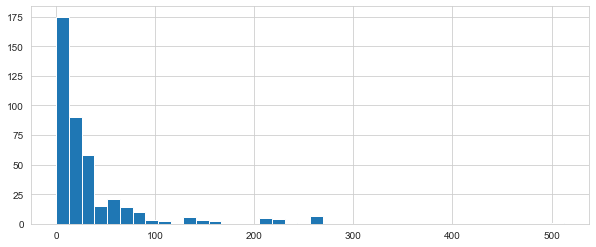

In [91]:
df['Fare'].hist(bins=40,figsize=(10,4))

In [92]:
import cufflinks as cf

In [93]:
cf.go_offline()

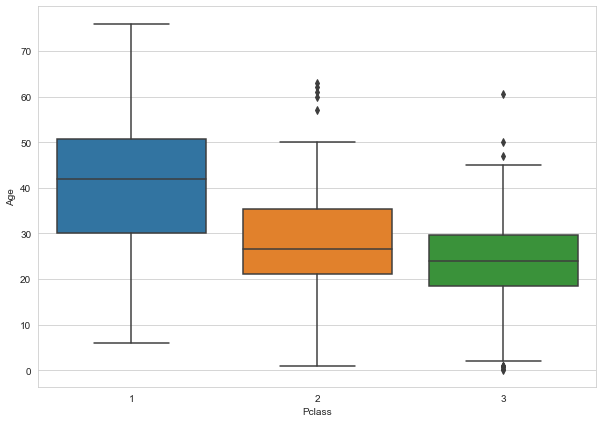

In [95]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=df)

In [98]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [99]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

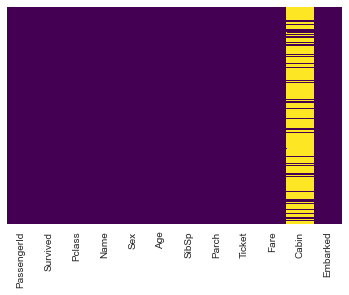

In [100]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [101]:
df.drop('Cabin',axis=1,inplace=True)

In [102]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [104]:
df.dropna(inplace=True)

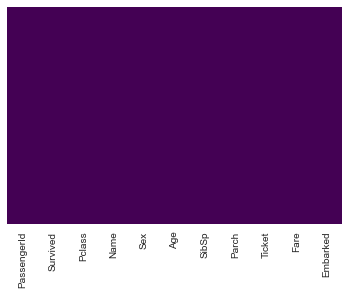

In [105]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [111]:
Sex = pd.get_dummies(df['Sex'],drop_first=True)

In [112]:
Sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [113]:
Embarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [114]:
Embarked.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [135]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [136]:
df=pd.concat([df,Sex,Embarked],axis=1)

In [137]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,892,0,3,34.5,0,0,7.8292,1,1,0,1,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,1,0,0,1
2,894,0,2,62.0,0,0,9.6875,1,1,0,1,1,0
3,895,0,3,27.0,0,0,8.6625,1,0,1,1,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,1,0,0,1


In [138]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [141]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\sankeerth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [142]:
predictions = lr.predict(x_test)

In [143]:
from sklearn.metrics import classification_report

In [144]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        61

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [145]:
from sklearn.metrics import confusion_matrix

In [146]:
print(confusion_matrix(y_test,predictions))

[[65  0]
 [ 0 61]]
